# Tutoriel sur le package StepMix (version R)
## Adapté du [tutoriel de Sacha Morin](https://colab.research.google.com/drive/1KAxcvxjL_vB2lAG9e47we7hrf_2fR1eK?usp=sharing#scrollTo=purSLTpt8TQx)
### Charles-Édouard Giguère
### 2023-05-25

# 1. Analyse sur des données continues.

Dans ce tutoriel, je reproduis les exemples du package stepmix pour
tester toutes les options du package et vérifier qu'elle fonctionne
avec stepmixr. J'ai ajouté des lignes de code pour visualiser les
résultats et voir comment on pourrait utiliser le package en contexte
pratique.

## Importation des packages
On importe les packages nécessaires pour faire rouler les exemples.

In [3]:
update.packages()

Update? (Oui/non/annuler)  Oui
Update? (Oui/non/annuler)  Oui
Update? (Oui/non/annuler)  Oui
Update? (Oui/non/annuler)  Oui
Update? (Oui/non/annuler)  annuler


admisc :
 Version 0.33 installed in C:/R/R-4.3.2/library 
 Version 0.34 available at https://cran.r-project.org
BayesFactor :
 Version 0.9.12-4.5 installed in C:/R/R-4.3.2/library 
 Version 0.9.12-4.6 available at https://cran.r-project.org
bookdown :
 Version 0.36 installed in C:/R/R-4.3.2/library 
 Version 0.37 available at https://cran.r-project.org
brio :
 Version 1.1.3 installed in C:/R/R-4.3.2/library 
 Version 1.1.4 available at https://cran.r-project.org
bslib :
 Version 0.5.1 installed in C:/R/R-4.3.2/library 
 Version 0.6.1 available at https://cran.r-project.org
cancelled by user


In [2]:
devtools::install_github("Labo-Lacourse/StepMixR@DEV")

rprojroot (2.0.3 -> 2.0.4) [CRAN]
rlang     (1.1.1 -> 1.1.2) [CRAN]
jsonlite  (1.8.7 -> 1.8.8) [CRAN]


Installing 3 packages: rprojroot, rlang, jsonlite



le package 'rprojroot' a été décompressé et les sommes MD5 ont été vérifiées avec succés
le package 'rlang' a été décompressé et les sommes MD5 ont été vérifiées avec succés


Warning message:
"impossible de supprimer l'installation précédente du package 'rlang'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problème lors de la copie de C:\R\R-4.3.2\library\00LOCK\rlang\libs\x64\rlang.dll vers C:\R\R-4.3.2\library\rlang\libs\x64\rlang.dll: Permission denied"
Warning message:
"'rlang' restauré"


le package 'jsonlite' a été décompressé et les sommes MD5 ont été vérifiées avec succés


Warning message:
"impossible de supprimer l'installation précédente du package 'jsonlite'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problème lors de la copie de C:\R\R-4.3.2\library\00LOCK\jsonlite\libs\x64\jsonlite.dll vers C:\R\R-4.3.2\library\jsonlite\libs\x64\jsonlite.dll: Permission denied"
Warning message:
"'jsonlite' restauré"



Les packages binaires téléchargés sont dans
	C:\Users\gigc2\AppData\Local\Temp\RtmpWCkOFa\downloaded_packages
── R CMD build ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
✔  checking for file 'C:\Users\gigc2\AppData\Local\Temp\RtmpWCkOFa\remotes23101fc41048\Labo-Lacourse-StepMixR-bd34c68/DESCRIPTION' (378ms)
─  preparing 'stepmixr':
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building 'stepmixr_0.1.1.tar.gz'
   


In [8]:
### Le notebook marche sur la version développement qui sera
### éventuellement sur CRAN.
### detach("package:stepmixr")
#devtools::install_github("Labo-Lacourse/stepmixr", "DEV")
library(stepmixr)
library(ggplot2)
library(dplyr, warn.conflicts = FALSE, quiet = TRUE)
theme_set(theme_bw() + theme(legend.position = "bottom"))

Chargement du fichier de données iris.
Le fichier est importé du package sklearn.
L'objet `df` est un data frame pandas (options `as_frame=True`)
l'objet `target` est aussi un data frame pandas.

In [9]:
df <- iris[, 1:4]; target <- iris[, 5] 

On peut afficher pour les sépales et pétales séparément
un graphique qui montre les longueurs sur les largeurs.
La couleur illustre les trois types de fleurs.
La séparation des trois espèces est assez claire; l'algorithme
devrait donc reproduire la structure assez facilement.

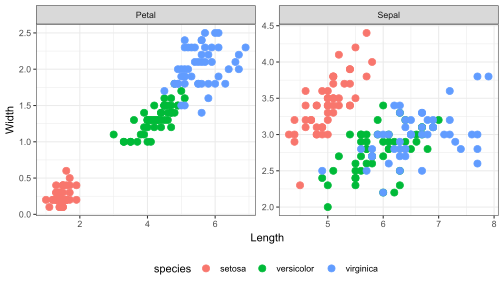

In [10]:
options(jupyter.plot_mimetypes = "image/svg+xml",
       repr.plot.height = 4)

iris_by_type <- rbind(data.frame(type = "Sepal",Length = iris[,1], Width = iris[,2], 
                                 species = iris[,5]),
                      data.frame(type = "Petal",Length = iris[,3], Width = iris[,4],
                                 species = iris[,5]))

ggplot(iris_by_type, aes(Length, Width, color = species)) + 
    geom_point(size = 3) + facet_wrap(~type, scales = "free")

On crée maintenant un modèle stepmix qu'on ajuste et qu'on
fit au jeu de données iris.

In [11]:
model <- stepmix(n_components=3, measurement="continuous", random_state=123)
fit1 <- fit(model, X = df)
#df

On sauvegarde maintenant les prédictions de l'appartenance
au groupe.

In [12]:
df['Class.Membership'] = predict(fit1, df[,1:4])

On affiche un bar plot de l'attribution dans chaque classe.

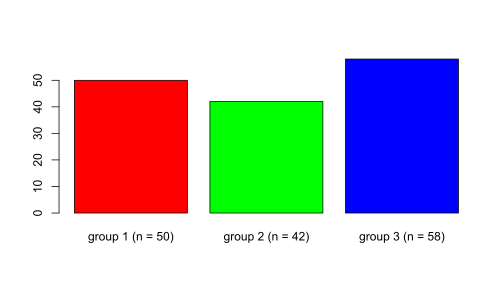

In [13]:
groups_mod1 <- sprintf("group %d (n = %d)", 1:3, table(df['Class.Membership']))
tab_mod1 <- table(df['Class.Membership'])
names(tab_mod1) <- groups_mod1
barplot(tab_mod1, col = c("red", "green", "blue"))

On peut comparer les espèces de fleur aux classes trouvées selon
les caractéristiques seulement. On constate que 95% des données
correspondent aux valeurs originales.

In [14]:
table(df[,'Class.Membership'], target)

   target
    setosa versicolor virginica
  0     50          0         0
  1      0         40         2
  2      0         10        48

On peut aussi examiner les valeurs des probabilités a posteriori.

In [15]:
post_prob_mod1 = predict_proba(fit1,df[,1:4])

Pourquoi certaines classes attribuées ne correspondent pas à leur
classe?
Affichons les points qui n'ont pas un match parfait avec l'espace.
On peut voir que la probabilité d'appartenance est plus basse car
il s'agit de points à la frontière des caractéristiques de deux
espèces.

In [16]:
post_prob_mod1[df[,'Class.Membership'] != (0:2)[target],] %>% 
    head %>% 
    round(3)

0,0.052,0.948
0,0.386,0.614
0,0.018,0.982
0,0.068,0.932
0,0.012,0.988
0,0.309,0.691


Les points qui sont classées dans un groupe différent de leur espèce
d'origine sont identifiés par des carrés. On peut les retrouver à la
frontière des deux espèces versicolor et virginica.

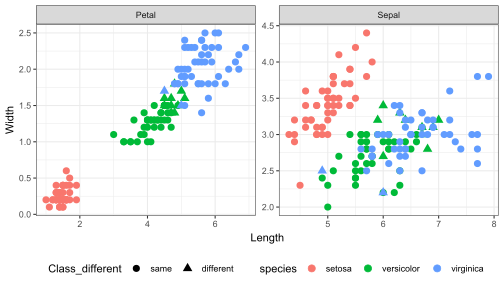

In [17]:
iris_by_type$Class_different <-  factor(df[,'Class.Membership'] != (0:2)[target], 
                                        labels = c("same", "different"))

ggplot(iris_by_type, aes(Length, Width, color = species, shape = Class_different)) + 
    geom_point(size = 3) + facet_wrap(~type, scales = "free")

Finalement, on peut voir que le rand score est très élevé.

In [18]:
fossil::rand.index(as.numeric(target), df[,'Class.Membership'])

[1] 0.9055034

# 2. Analyses sur des données dichotomiques.

Création de données dichotomiques basées sur les quantiles.

In [19]:
binary_data = sapply(df[,1:4], function(x) (0:1)[cut(x,breaks = 2)])
head(binary_data)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,1,0,0
0,0,0,0
0,0,0,0
0,0,0,0
0,1,0,0
0,1,0,0


On fait le modèle et on ajuste les données au jeux de données
binaires. On extrait ensuite l'attribution dans les groupes.

In [20]:
model <- stepmix(n_components=3, measurement="binary",
                verbose=1, random_state=123)
fit1 <- fit(model, binary_data)
df['binary_pred'] <- predict(fit1, binary_data)

On peut voir que le type de fleur n'est pas aussi bien prédit
et que le rand_score n'est pas aussi bon. Ceci est attendu car
en dichotomisant on perd de l'information.

In [21]:
table(target, df[,'binary_pred'])
sprintf("Rand index = %.4f", fossil::rand.index(as.numeric(target), 
                                                df[,'binary_pred']))

            
target        0  1  2
  setosa     50  0  0
  versicolor 10 27 13
  virginica   0 11 39

[1] "Rand index = 0.7777"

In [22]:
binary_means = fit1$get_parameters()[["measurement"]][["pis"]]

Les paramètres sont bornés de 0 à 1 car ils représentent la probabilité
que le feature soit 1 (par rapport à la référence de 0).

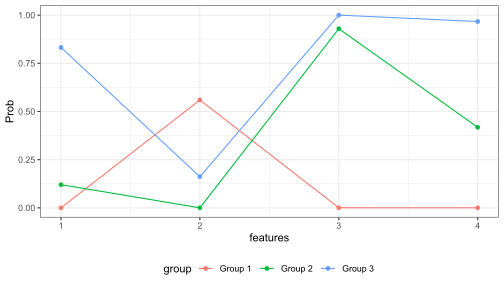

In [23]:
data.frame(Prob = as.vector(binary_means),
           group = factor(rep(1:3, 4), labels = c("Group 1", "Group 2", "Group 3")),
           features = rep(1:4, c(3,3,3,3))) %>% 
    ggplot(aes(features,Prob, group = group, col = group)) + 
    geom_line() + geom_point()

# 3. Analyses sur des données catégorielles.
on reprend l'exemple continue en séparant en trois catégories
ordonnées.

In [24]:
categorical_data = sapply(df[, 1:4], function(x) (0:2)[cut(x,breaks = 3)])
head(categorical_data)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,1,0,0
0,1,0,0
0,1,0,0
0,1,0,0
0,1,0,0
0,2,0,0


À noter que les colonnes sont indexées 0, 1, 2. On ajuste le modèle avec l'option catégorielle, on fait l'ajustement
du modèle et on prédit l'appartenance au trois catégories.

In [25]:
model = stepmix(n_components=3, measurement="categorical",
                verbose=1, random_state=123)
fit1 <- fit(model, categorical_data)
df[,'categorical_pred'] = predict(fit1, categorical_data)

On change les catégories de références afin de correspondre aux espèces.

In [26]:
df[, 'categorical_pred2'] <- c(0, 2, 1)[df[, 'categorical_pred'] + 1]

On peut voir que l'organisation des classes est très bonne. Le rand score
se situe entre la prédiction en continue et celle dichotomique.

In [27]:
table(target, c(1,3,2)[df[, 'categorical_pred'] + 1])

            
target        1  2  3
  setosa     50  0  0
  versicolor  0 50  0
  virginica   0 10 40

In [28]:
fossil::rand.index(as.numeric(target), df[,'categorical_pred'])

[1] 0.9194631

In [29]:
rand_score_models <- data.frame(
    rand_index = c(fossil::rand.index(as.numeric(target), df[,'binary_pred']),
                   fossil::rand.index(as.numeric(target), df[,'categorical_pred']),
                   fossil::rand.index(as.numeric(target), df[,'categorical_pred'])))
rand_score_models$type = c("binary", "Categorical", "Continuous")

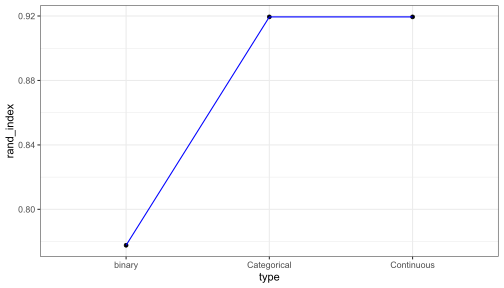

In [30]:
ggplot(rand_score_models, aes(type, rand_index)) + geom_point() + geom_line(group = 1, color = "blue")

# 4. Analyses sur des données de types mélangés

La fonction suivante permet de faire un modèle utilisant des données
de plusieurs types différents. L'objet `df_mixed` contient les
données et l'objet `mixed_descriptor` l'information sur le type associé
à chaque colonne.

In [31]:
## More complex models need a more complex description
### StepMix provides a function to quickly build mixed descriptors for DataFrames
df_mixed <- cbind(df[,1:2], Petal.Length = binary_data[,3], Petal.Width = categorical_data[,4]) 
### Unspecified variables are simply not included in mixed_data
md <- mixed_descriptor(data = df_mixed, continuous = 1:2, binary = 3, 
     categorical = 4)

In [32]:
head(df_mixed)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
,<dbl>,<dbl>,<int>,<int>
1,5.1,3.5,0,0
2,4.9,3.0,0,0
3,4.7,3.2,0,0
4,4.6,3.1,0,0
5,5.0,3.6,0,0
6,5.4,3.9,0,0


In [33]:
md$descriptor

$continuous
$continuous$model
[1] "continuous"

$continuous$n_columns
[1] 2


$binary
$binary$model
[1] "binary"

$binary$n_columns
[1] 1


$categorical
$categorical$model
[1] "categorical"

$categorical$n_columns
[1] 1

On ajuste le modèle avec deux variables continues, une variable dichotomique
et une variable catégorielle.

In [34]:
# Pass descriptor to StepMix and fit model
model = stepmix(n_components=3, measurement=md$descriptor, random_state=as.integer(123))
# Fit model
mixed_fit <- fit(model, md$data)
# Class predictions
md$data['mixed_pred'] <- predict(mixed_fit, X = md$data)

Voici le tableau croisé avec les espèces et le rand score.

In [35]:
table(md$data[,'mixed_pred'],iris$Species)

   
    setosa versicolor virginica
  0     50          0         0
  1      0         26         3
  2      0         24        47

In [36]:
fossil::rand.index(as.numeric(target), md$data[,'mixed_pred'])

[1] 0.8236242

# 5. Analyses incluant des données manquantes (type = continue)

Ici, on recopie les données en continue et on génère
des données manquantes (20 %)

In [37]:
df_na <- as.matrix(df)
df_na[sample(1:600,120)] <- NaN 
df_na <- as.data.frame(df_na)

In [38]:
head(df_na[,1:4])

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
,<dbl>,<dbl>,<dbl>,<dbl>
1,5.1,3.5,NaN,0.2
2,NaN,3.0,1.4,0.2
3,NaN,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
6,NaN,3.9,1.7,0.4


Comme toujours, on crée le modèle, on l'ajuste et on fait la prédiction.

In [39]:
model <- stepmix(n_components=3, measurement="continuous_nan",
                verbose=1, random_state=123)
fit1 <- fit(model, df_na[,1:4])
df[,'continuous_pred_nan'] <- predict(fit1, df_na[,1:4])

On compare les prédictions aux espèces originales.

In [40]:
table(target, df[,'continuous_pred_nan'])

            
target        0  1  2
  setosa     50  0  0
  versicolor  0 43  7
  virginica   0  7 43

In [41]:
fossil::rand.index(as.numeric(target), df[,'continuous_pred_nan'])

[1] 0.8922595

# 6. Modèle structurelle: Classe + prédictions

On simule les données selon les modèles présentés dans l'article
de Zsuzsa Bakk.

- X contient les données sur lesquels on ajuste les classes latentes
- y est la variable dépendante (composante structurelle).
- target contient les "vrais" valeurs de groupes.

In [42]:
dbr <- data_bakk_response(n_samples=2000, sep_level=.9, random_state=42)
X <- dbr[[1]]; y <- dbr[[2]]; target <- dbr[[3]]

In [43]:
# On crée le modèle, on ajuste aux données X et Y.
model = stepmix(n_components=3, measurement='binary',
                structural='gaussian_unit', verbose=1,
                random_state=123)

In [44]:
fit1 <- fit(model, X, y)
summary(fit1)

StepMix(abs_tol=0.001, max_iter=100, measurement='binary', n_components=3,
        random_state=123, rel_tol=1e-10, verbose=1)


On peut comparer les classes obtenues aux prédictions.

In [45]:
preds = predict(fit1, X, y)
# J'ajoute +1 car R commence ses index à 1.
preds2 = c(0, 2, 1)[preds+1]

In [46]:
preds_tabs = table(target, preds2)
preds_tabs

      preds2
target   0   1   2
     0 637   9   3
     1  12 649  16
     2   2  17 655

In [47]:
preds_pgood = sum(diag(preds_tabs)) / sum(preds_tabs) * 100
sprintf("%.1f %% de bonne prédiction",preds_pgood)

[1] "97.0 % de bonne prédiction"

On s'intéresse aussi à la prédiction de la valeur y.
Les valeurs représente la moyenne de ces valeurs dans chaque
groupe.

In [48]:
fit1$get_parameters()['structural']

-1.01405096
-0.03352722
0.96553258


Normalement, dans une régression on voudrait avoir des erreurs-types (se)
et des p-values associées à des tests pour confirmer qu'il y a des
différence entre les moyennes. Dans stepmix, on peut faire cela à l'aide du
bootstrapping. Pour l'instant, on ne fait qu'afficher le résultat et
la méthode de bootstrapping est présenté à la section 11. On peut voir une
grande séparation entre les moyennes (la séparation dans les données étaient
de 0.9).

In [49]:
params <- as.table(fit1$get_parameters()[['structural']][['means']][,1])
names(params) <- c("Classe 1", "Classe 2", "Classe 3")

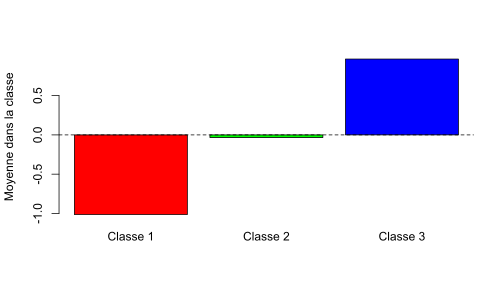

In [50]:
barplot(params, col = c("red", "green", "blue"), ylab = "Moyenne dans la classe")
abline(h = 0, lty = 2)

# 7. modèle structurel: classes + prédicteurs de classe.

On simule les données selon les modèles présentés dans l'article de Zsuzsa Bakk.

- X contient les données pour les classes latentes.
- y est le prédicteur de classe.
- target are ground truth class memberships

In [51]:
dbr <- data_bakk_covariate(n_samples=2000, sep_level=.9,
                           random_state=42)
X <- apply(dbr[[1]], 2, as.integer); y <- as.integer(dbr[[2]]); target <- dbr[[3]]

Le modèle avec covariable a une procédure interne dans laquelle on peut
ajouter des arguments supplémentaires comme le taux d'apprentissage et
la méthode d'optimisation. Dans cet exemple on utilise l'algorithme de
Newton-Raphson et on inclue un intercept dans le modèle. Dans R, on doit 
utiliser une liste plutôt qu'un dictionnaire. Il est important de déclarer 
le 1 comme un entier pour qu'il soit transféré à Python comme tel.

In [52]:
opt_params = list(
    method    = 'newton-raphson',  # Can also be "gradient",
    intercept = TRUE,
    max_iter  = as.integer(1)  # Number of opt. step each time we update the model
)

On définit le modèle et on l'ajuste aux données.

In [53]:
model = stepmix(n_components=3, measurement='binary',
                structural='covariate', structural_params=opt_params,
                verbose=1, random_state=123)
# Fit data
# Provide both measurement data X and structural data Y
fit1 <- fit(model, X, y)

On compare nos classes aux "vrais" classes.

In [54]:
preds = predict(fit1, X, y)
preds2 = c(2, 0, 1)[preds + 1]
table(target, preds2)

      preds2
target   0   1   2
     0 650  14   4
     1  15 624  12
     2   2  10 669

Voici la façon d'extraire les betas et les prédictions de
probabilités *a priori*. On peut voir qu'il faut faire une tranformation
pour obtenir un beta normalisé.

In [55]:
BETA = fit1$get_parameters()[['structural']][['beta']]
BETA

-3.2940879,1.04030322
0.4531884,0.01204802
2.8404952,-1.05307636


In [56]:
# On met la catégorie 1 comme référence.
BETA = BETA - c(1,1,1) %o% BETA[1,]

Voici comment la prédiction est faite. Je prends seulement les 5
premières rangées.
1. On calcule une matrice de design.

In [57]:
XX = cbind(1, y[1:5])
XX

1,4
1,5
1,3
1,5
1,5


2. On multiplie X par beta.

In [58]:
la = XX %*% t(BETA)
exp(la)

1,0.6936800,0.1065719
1,0.2480811,0.0131371
1,1.9396562,0.8645419
1,0.2480811,0.0131371
1,0.2480811,0.0131371


3. Pour chaque rangée, on calcule
$p_i = exp(\lambda_i)/\sum_i exp(\lambda_i)$

In [59]:
PRB_APRIORI = exp(la) / matrix(apply(exp(la), 1, sum), 5, 3)

# 8. Estimation 1-step, 2-step et 3-step.

On simule les données selon l'article de Zsuzsa Bakk.

- X contient les données sur lesquels on ajuste les classes latentes
- y est la variable dépendante (composante structurelle).
- target contient les "vrais" valeurs de groupes.

In [79]:
dbr = data_bakk_response(n_samples=2000, sep_level=.8, random_state=42)
X <- apply(dbr[[1]], 2, as.integer); y <- as.double(dbr[[2]]) ; target <- dbr[[3]]

Estimation 1 étape (1-step). Ici, tout est mesuré en une étape.
C'est-à-dire que les paramètres de la classe vont changer selon qu'on
inclue la variable y ou non.

In [80]:
model = stepmix(n_components=3, measurement='binary', n_steps=1,
                structural='gaussian_unit', verbose=0,
                random_state=123)
fit1 <- fit(model, X, y)
ll_1 = fit1$score(X, y)

Modèle à 2 étapes. On fait le modèle de classe latente, ensuite on
prédit y en utilisant les paramètres de classe latente fixée.


In [81]:
model$n_steps = as.integer(2)
fit2 <- fit(model,X, y)
ll_2 = fit2$score(X, y)

Modèle à 3 étapes. On fait le modèle de classe latente, ensuite on
sauvegarde les données de classe et on fait la prédiction basée sur
cette classe. Le modèle à trois étapes (three steps) ne fonctionne pas 
si on envoie un `data.frame`, je dois donc envoyer une matrice plutôt. 

In [87]:
model = stepmix(n_components=3, measurement='binary', n_steps=as.integer(3),
                structural='gaussian_unit', verbose=0,
                random_state=123)
y <- matrix(y, 2000, 1)
fit3 <- fit(model, X, y)
ll_3 <- fit3$score(X, y)

In [89]:
c(sprintf("1-step : %.4f", ll_1),
  sprintf("2-step : %.4f", ll_2),
  sprintf("3-step : %.4f", ll_3))

[1] "1-step : -5.7292" "2-step : -5.6499" "3-step : -5.6874"

Voici comment naviguer à travers les différents paramètres de stepmix.

In [90]:
model = stepmix(n_components=3, measurement='binary', n_steps=3,
                structural='gaussian_unit', verbose=0,
                random_state=123)

On navigue à travers les différentes options.

In [91]:
result = expand.grid(c = c(NA, "BCH", "ML"), a = c("modal", "soft")) 

In [93]:

for(i in 1:6){
    if(is.na(result[i, "c"]))
        model$correction = NULL
    else
        model$correction = result[i, "c"]
    model$assignment = result[i, "a"]
    fitca <- fit(model, X, y)
    result[i,"ll"] <- fitca$score(X, y)
}


On met toutes les valeurs de résultats dans un data.frame.

In [94]:
result

c,a,ll
<fct>,<fct>,<dbl>
NA,modal,-5.687382
BCH,modal,-460.485490
ML,modal,-5.649421
NA,soft,-5.730908
BCH,soft,-228.676442
ML,soft,-5.732913


# 9. Comment trouver les paramètres optimaux ?
Dans cet exemple, on tente de trouver le nombre de composantes et
le nombre d'étapes optimales?

On simule à nouveau des données basées sur l'article de Szusza Bakk.

In [95]:
dbr = data_bakk_response(n_samples=2000, sep_level=.7, 
                         random_state=42)

On définie le modèle de base.

In [148]:
model = stepmix(n_components=3, n_steps=1, measurement='bernoulli',
                verbose=0, structural='gaussian_unit', random_state=42)
fit1  <- fit(model, X, y)

On utilise maintenant la grille de recherche (grid search) de scikit-Learn.
On teste des classes de 1 à 8 et des estimations à 1, 2 et 3 étapes. 3
estimations sont faits pour chaque combinaison ce qui donne 72 estimations.
Ceci suppose que scikit-Learn est installé sur la version de python utilisé 
dans R. 

In [149]:
mod_sel <- reticulate::py_run_string("from sklearn.model_selection import GridSearchCV, ParameterGrid")
grid = list(n_components = 1:8, n_steps = 1:3)  # une liste R est converti en dict python

Comme stepmix utilise les standards de sci-kit learn (fit et predict)
la méthode gridsearch s'utilise facilement.

In [150]:
gs <-  mod_sel$GridSearchCV(estimator=fit1, cv=as.integer(3), 
                            param_grid=grid)

On peut transmettre le fit automatiquement à tous les modèles
de la grille de recherche.

In [151]:
gs$fit(X, y)

GridSearchCV(cv=3,
             estimator=StepMix(abs_tol=0.001, max_iter=100, n_components=3,
                               random_state=42, rel_tol=1e-10),
             param_grid={'n_components': [1, 2, 3, 4, 5, 6, 7, 8],
                         'n_steps': [1, 2, 3]})

On peut extraire les résultats de la grille.

In [152]:
results <- gs$cv_results_
results.df <- data.frame(param_n_components = unlist(results[['param_n_components']]),
                         param_n_steps      = unlist(results[['param_n_steps']]),
                         mean_test_score    = results[['mean_test_score']])

[1] "mean_fit_time"      "std_fit_time"       "mean_score_time"   
 [4] "std_score_time"     "param_n_components" "param_n_steps"     
 [7] "params"             "split0_test_score"  "split1_test_score" 
[10] "split2_test_score"  "mean_test_score"    "std_test_score"    
[13] "rank_test_score"

On affiche les paramètres par nombre de composantes et par nombre d'étapes.
Plus l'estimateur est élevée, meilleur est l'ajustement.

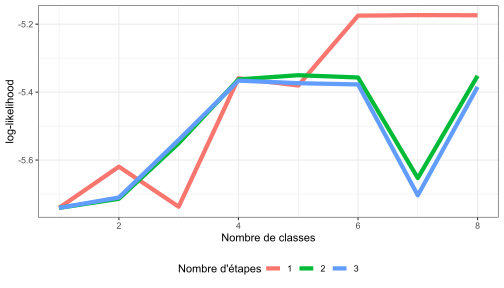

In [168]:
ggplot(results.df, aes(param_n_components, y = mean_test_score, color = factor(param_n_steps))) + 
    geom_line(aes(group = param_n_steps), lwd = 2) + xlab("Nombre de classes") +
    labs(color = "Nombre d'étapes") + ylab("log-likelihood")

In [161]:
# Same model and grid as above
AIC <- BIC <- NULL
for(g in reticulate::iterate(mod_sel$ParameterGrid(grid))){
    model$n_components = g$n_components
    model$n_steps = g$n_steps
    fitg = fit(model, X, y)
    AIC <- c(AIC, fitg$aic(X, y))
    BIC <- c(BIC, fitg$bic(X, y))
}

In [162]:
# Save results to a dataframe
results.df <- cbind(results.df, AIC, BIC)

On peut aussi utiliser l'AIC et le BIC qui pénalise respectivement pour le
nombre de paramètres et pour le nombre de paramètres et la taille
d'échantillon. Ici le sens est renversé, plus le AIC/BIC est bas,
plus l'ajustement est bon.

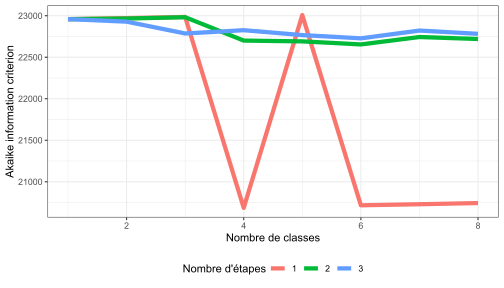

In [167]:
# AIC
ggplot(results.df, aes(param_n_components, y = AIC, 
                       color = factor(param_n_steps))) + 
  geom_line(aes(group = param_n_steps), lwd = 2) + 
  xlab("Nombre de classes") +
  labs(color = "Nombre d'étapes") + 
  ylab("Akaike information criterion")

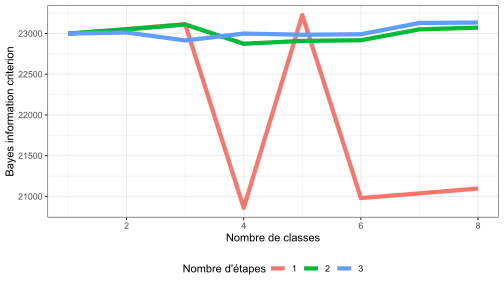

In [170]:
# BIC
ggplot(results.df, aes(param_n_components, y = BIC, 
                       color = factor(param_n_steps))) + 
  geom_line(aes(group = param_n_steps), lwd = 2) + 
  xlab("Nombre de classes") +
  labs(color = "Nombre d'étapes") + 
  ylab("Bayes information criterion")

# 10. Extraction des paramètres.

On simule à nouveau des données selon l'article de Szusza Bakk.

In [171]:
dbr <- data_bakk_response(n_samples=2000, sep_level=.7,
                          random_state=42)
X <- dbr[[1]]; y <- matrix(dbr[[2]], 2000, 1); target <- dbr[[3]]

On ajuste le modèle et on l'ajuste au modèle.

In [172]:
model = stepmix(n_components=3, n_steps=1, measurement='bernoulli',
                structural='gaussian_unit', random_state=42)
fit1 <- fit(model, X, y)

In [173]:
# On peut extraire les paramètres.
params = fit1$get_parameters()

In [174]:
# Probabilité *a priori*
params['weights']

$weights
[1] 0.3333236 0.3333859 0.3332905

On peut extraire le type de mesure. 'pis' réfère à la probabilité dans
chaque classe.

On peut afficher les probabilités

In [177]:
params[['measurement']][['pis']]

0.5680155,0.5842023,0.5902277,0.4194788,0.4198038,0.4352547
0.5383574,0.5636633,0.5865015,0.4218408,0.4168013,0.4442989
0.5691320,0.5786369,0.5917716,0.4156796,0.4098941,0.4329446


# 11. Apply bootstrap to estimate parameter variances

On simule à nouveau des données basées sur l'article de Szusza Bakk.

In [178]:
dbr <- data_bakk_response(n_samples=2000, sep_level=.9, random_state=42)
X <- dbr[[1]]; y <- matrix(dbr[[2]], 2000, 1); target <- dbr[[3]]

On propose un modèle de mesure dichotomique avec variable dépendante
normale.

In [180]:

reticulate::py_run_string("from stepmix.stepmix import StepMix")

instr1 = 'model = StepMix(n_components=3, n_steps=1, measurement=\'bernoulli\',
                structural=\'gaussian_unit\', random_state=42, verbose=0)'

reticulate::py_run_string(instr1)

fit1 <- fit(model, X, y)

On effectue 1000 échantillon boostrap de nos valeurs.

In [199]:
reticulate::py_run_string("from stepmix.bootstrap import bootstrap")
#boot <- reticulate::import("stepmix.bootstrap")
reticulate::py_set_attr(X)
help(py_set_attr)
library(reticulate)

r_to_py(X)
py$X = r_to_py(X)
py$y = r_to_py(y)
X = reticulate::r_to_py(X)
test = reticulate::py_run_string('model, bootstrapped_params = bootstrap(model, X, y, n_repetitions=1000)')
py$bootstrapped_params
result_boot <- boot$bootstrap(fit1, X, y, 
                              n_repetitions=as.integer(10)))
model, bootstrapped_params = bootstrap(model, X, y, n_repetitions=1000)

reticulate::py_run_string("test = 1")
test = reticulate::py_run_string("test")
test$test
reticulate::py_to_r(test)
result_boot
names(boot)
boot$GridSearchCV

In [201]:
bootstrapped_params['measurement']['pis']

ERROR while rich displaying an object: 'NoneType' object has no attribute 'shape'
Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_text.default(obj)
8. paste(capture.output(print(obj)), coll

On obtient des moyennes et des mesures de variances qu'on peut utiliser
pour créer un data.frame. Une table de coefficients. On suppose ici
la normalité asymptotique des échantillons bootstraps.

In [207]:
Coef_table = pd.DataFrame(
    {'Est': np.mean(bootstrapped_params['measurement']['pis'],
                    axis=0).reshape(18, 1)[:, 0],
     'SE': np.std(bootstrapped_params['measurement']['pis'],
                  axis=0).reshape((18, 1))[:, 0]})

In [208]:
Coef_table['Est/SE'] = Coef_table['Est'] / Coef_table['SE']

In [211]:
Coef_table['P(<|t|)'] = 2 * norm.cdf(-np.abs(Coef_table['Est/SE']))

In [212]:
# Supposons qu'on veut calculer l'intervalle de confiance
# du premier paramètre
param_c0_response = bootstrapped_params['structural']['means'][:, 0, 0]

In [213]:
# On extrait les percentiles 2.5 et 97.5.
plow = np.percentile(param_c0_response, q=2.5)
phigh = np.percentile(param_c0_response, q=97.5)

on affiche les intervalles de confiance sur
l'histogramme de la distribution.

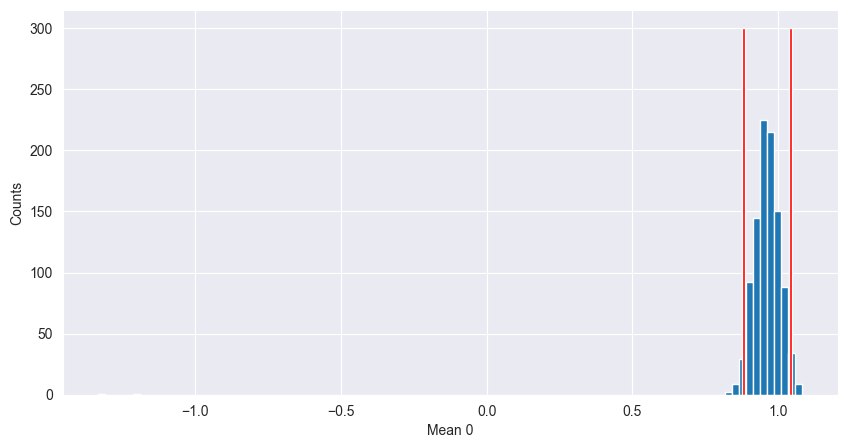


95% Percentile CI: (0.8802, 1.0431)


In [214]:
plt.hist(param_c0_response, bins=100)
plt.xlabel("Mean 0")
plt.ylabel("Counts")
plt.bar(plow, height=300, width=.01, color="r")
plt.bar(phigh, height=300, width=.01, color="r")
plt.show()
print(f"\n95% Percentile CI: ({plow:.4f}, {phigh:.4f})")

Une méthode a été ajouté dans stepmix pour
afficher les estimés bootstrap.

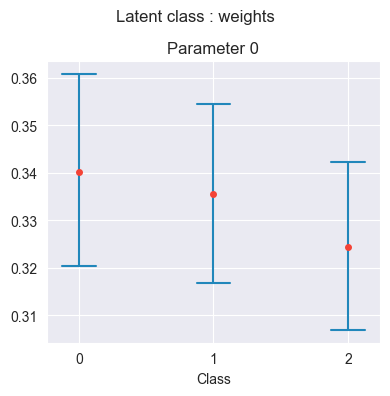

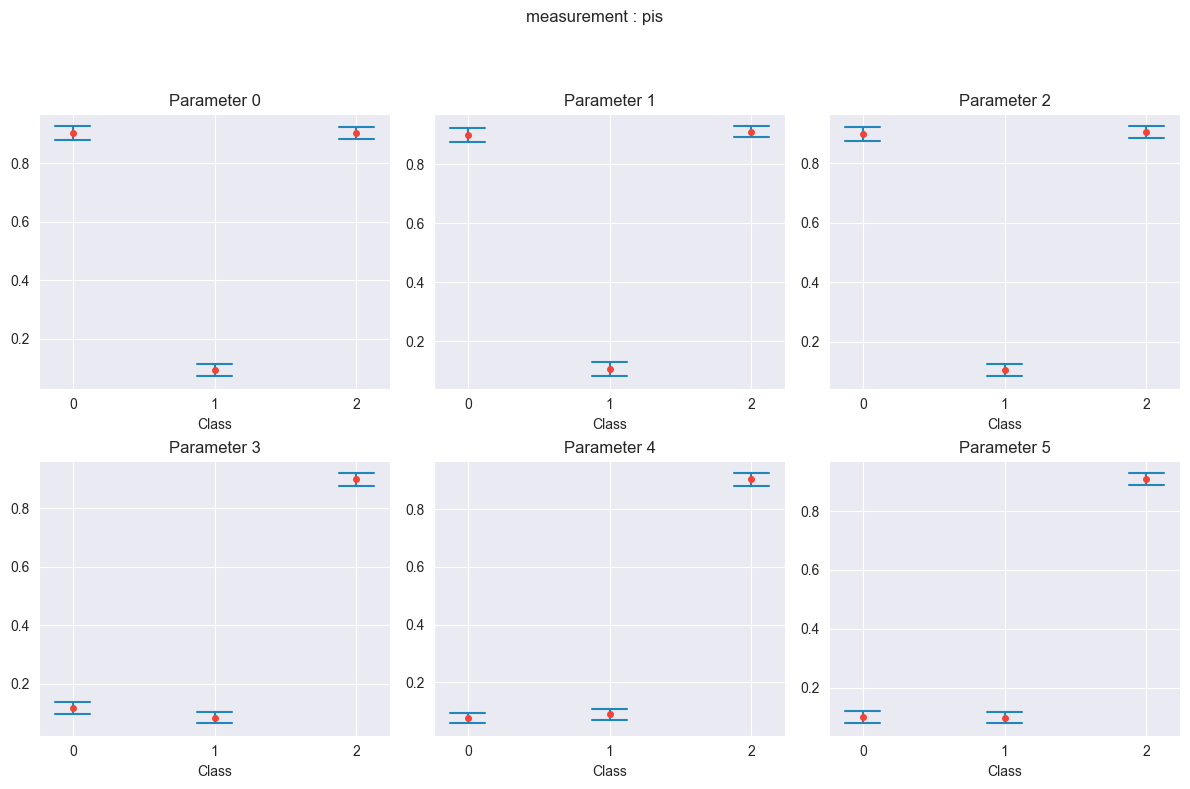

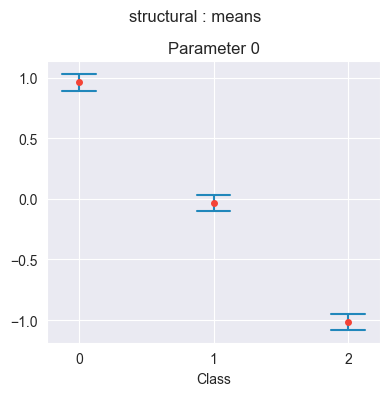

In [216]:
# On créé les figures.
figures = plot_all_parameters_CI(model.get_parameters(),
                                 bootstrapped_params, alpha=5)
# et on les affiche.
for f in figures:
    f.subplots_adjust(top=0.85)  # Temp fix